# 이미지 분류 (합성곱신경망, CNN)
- Fashion-mnist 데이터셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 데이터준비

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [4]:
# 시각화

samples = np.random.randint(60000, size=9)
samples


array([22580, 31057, 52945,  9172, 53589, 11319, 11884, 46607, 25806])

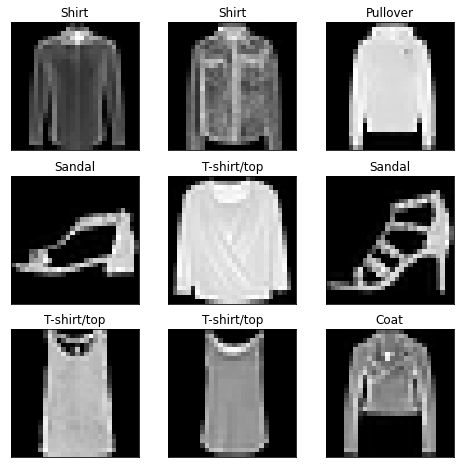

In [5]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])
plt.show()

# 검증용 데이터 (Validation Data)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape, X_val.shape) 
print(y_train.shape, y_test.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (10000,)


# 정규화

In [7]:
X_train = X_train.astype('float32')/255.
X_val = X_val/255.
X_test = X_test/255.

In [8]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [9]:
y_train[:10]

array([3, 6, 7, 9, 4, 7, 3, 8, 1, 7], dtype=uint8)

In [10]:
# 원핫인코딩 (다중분류)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [11]:
y_train_oh[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 모델

In [12]:
X_train.shape

(42000, 28, 28)

In [13]:
X_train = X_train.reshape(-1, 28, 28, 1)                                                    #3차원 흑백으로 변경
X_train.shape

(42000, 28, 28, 1)

In [14]:
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [15]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                  input_shape=(28, 28, 1)),                                                 #3차원
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),                                                   

    layers.Flatten(),

    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')                                            #최종 출력층 : y_train_oh.shape과 units 일치 = 10
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [17]:
EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 17s 5ms/step - loss: 0.5459 - acc: 0.8021 - val_loss: 0.3741 - val_acc: 0.8676
Epoch 2/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3595 - acc: 0.8699 - val_loss: 0.3306 - val_acc: 0.8819
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3113 - acc: 0.8859 - val_loss: 0.3029 - val_acc: 0.8892
Epoch 4/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2785 - acc: 0.8988 - val_loss: 0.2970 - val_acc: 0.8924
Epoch 5/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2549 - acc: 0.9051 - val_loss: 0.2626 - val_acc: 0.9056
Epoch 6/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2333 - acc: 0.9154 - val_loss: 0.2656 - val_acc: 0.9042
Epoch 7/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2135 - acc: 0.9218 - val_loss: 0.2691 - val_acc: 0.9054
Epoch 8/50
1313/1313 [==============================] - 7s 6m

In [18]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

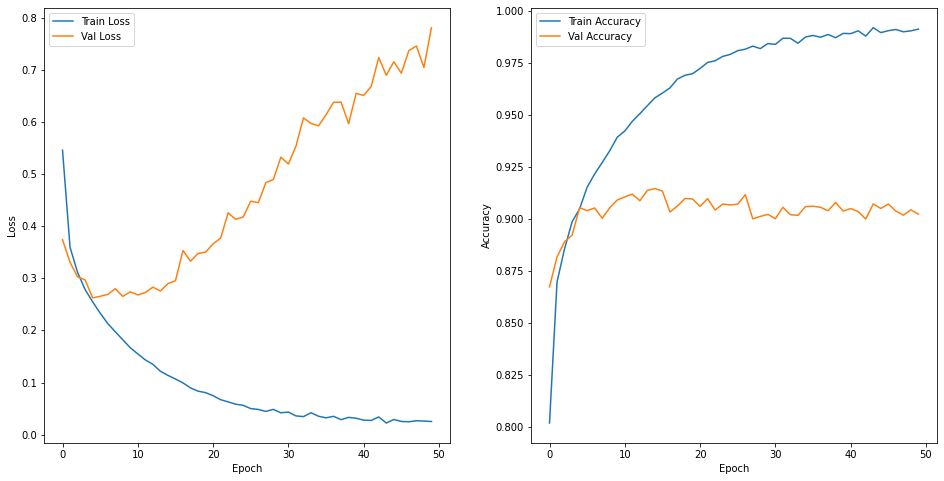

In [19]:
plot_history(log)

In [20]:
# 평가

model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0217 - acc: 0.9917


[0.021662458777427673, 0.9916666746139526]

In [21]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8901 - acc: 0.8918


[0.890098512172699, 0.8917999863624573]

In [22]:
# 예측

y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.52120104e-19, 7.77552434e-35, 2.23184919e-36, 2.42990374e-15,
        2.24013955e-29, 1.07688381e-12, 7.63572776e-35, 1.70055620e-13,
        2.34994283e-19, 1.00000000e+00],
       [1.15665295e-23, 0.00000000e+00, 1.00000000e+00, 5.93012074e-30,
        1.00812455e-21, 0.00000000e+00, 8.02085616e-25, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.18339876e-32, 1.00000000e+00, 6.58266624e-33, 9.28509870e-26,
        8.75604528e-34, 6.17352688e-38, 7.25803476e-30, 0.00000000e+00,
        3.26609820e-33, 0.00000000e+00],
       [6.09938458e-18, 1.00000000e+00, 2.21538370e-22, 1.23529434e-19,
        1.77867278e-21, 1.49840720e-32, 2.81761395e-19, 0.00000000e+00,
        1.81608260e-26, 0.00000000e+00],
       [2.30169028e-01, 4.80046410e-19, 1.01251416e-07, 3.39581078e-07,
        3.32151373e-08, 1.07719454e-23, 7.69830585e-01, 6.96767558e-28,
        2.24726602e-25, 8.96100973e-30]], dtype=float32)

In [23]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

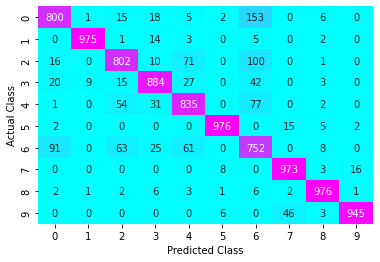

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [27]:
# 오답인 이미지를 시각화

samples = np.where((y_test != y_pred))[0]                    #samples = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([1471,   12, 7068, 2507,  378, 9715, 9919, 2318, 3058])

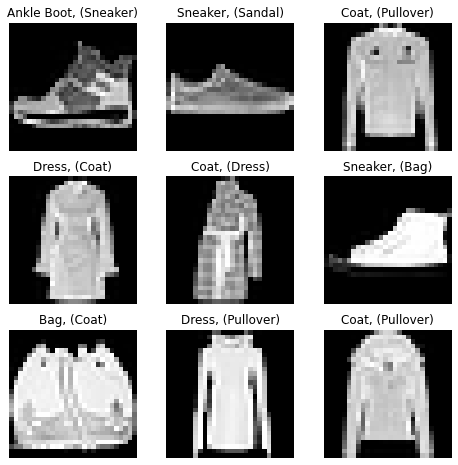

In [28]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')                          #이미지로 나타내기 위해 X_test 다시 reshape
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()